
Reading CSV files:
  Reading: od_20231007_1.csv
  Reading: stay_20231006_1.csv
  Reading: stay_20231007_1.csv
  Reading: stay_20231008_1.csv
Total files read: 4


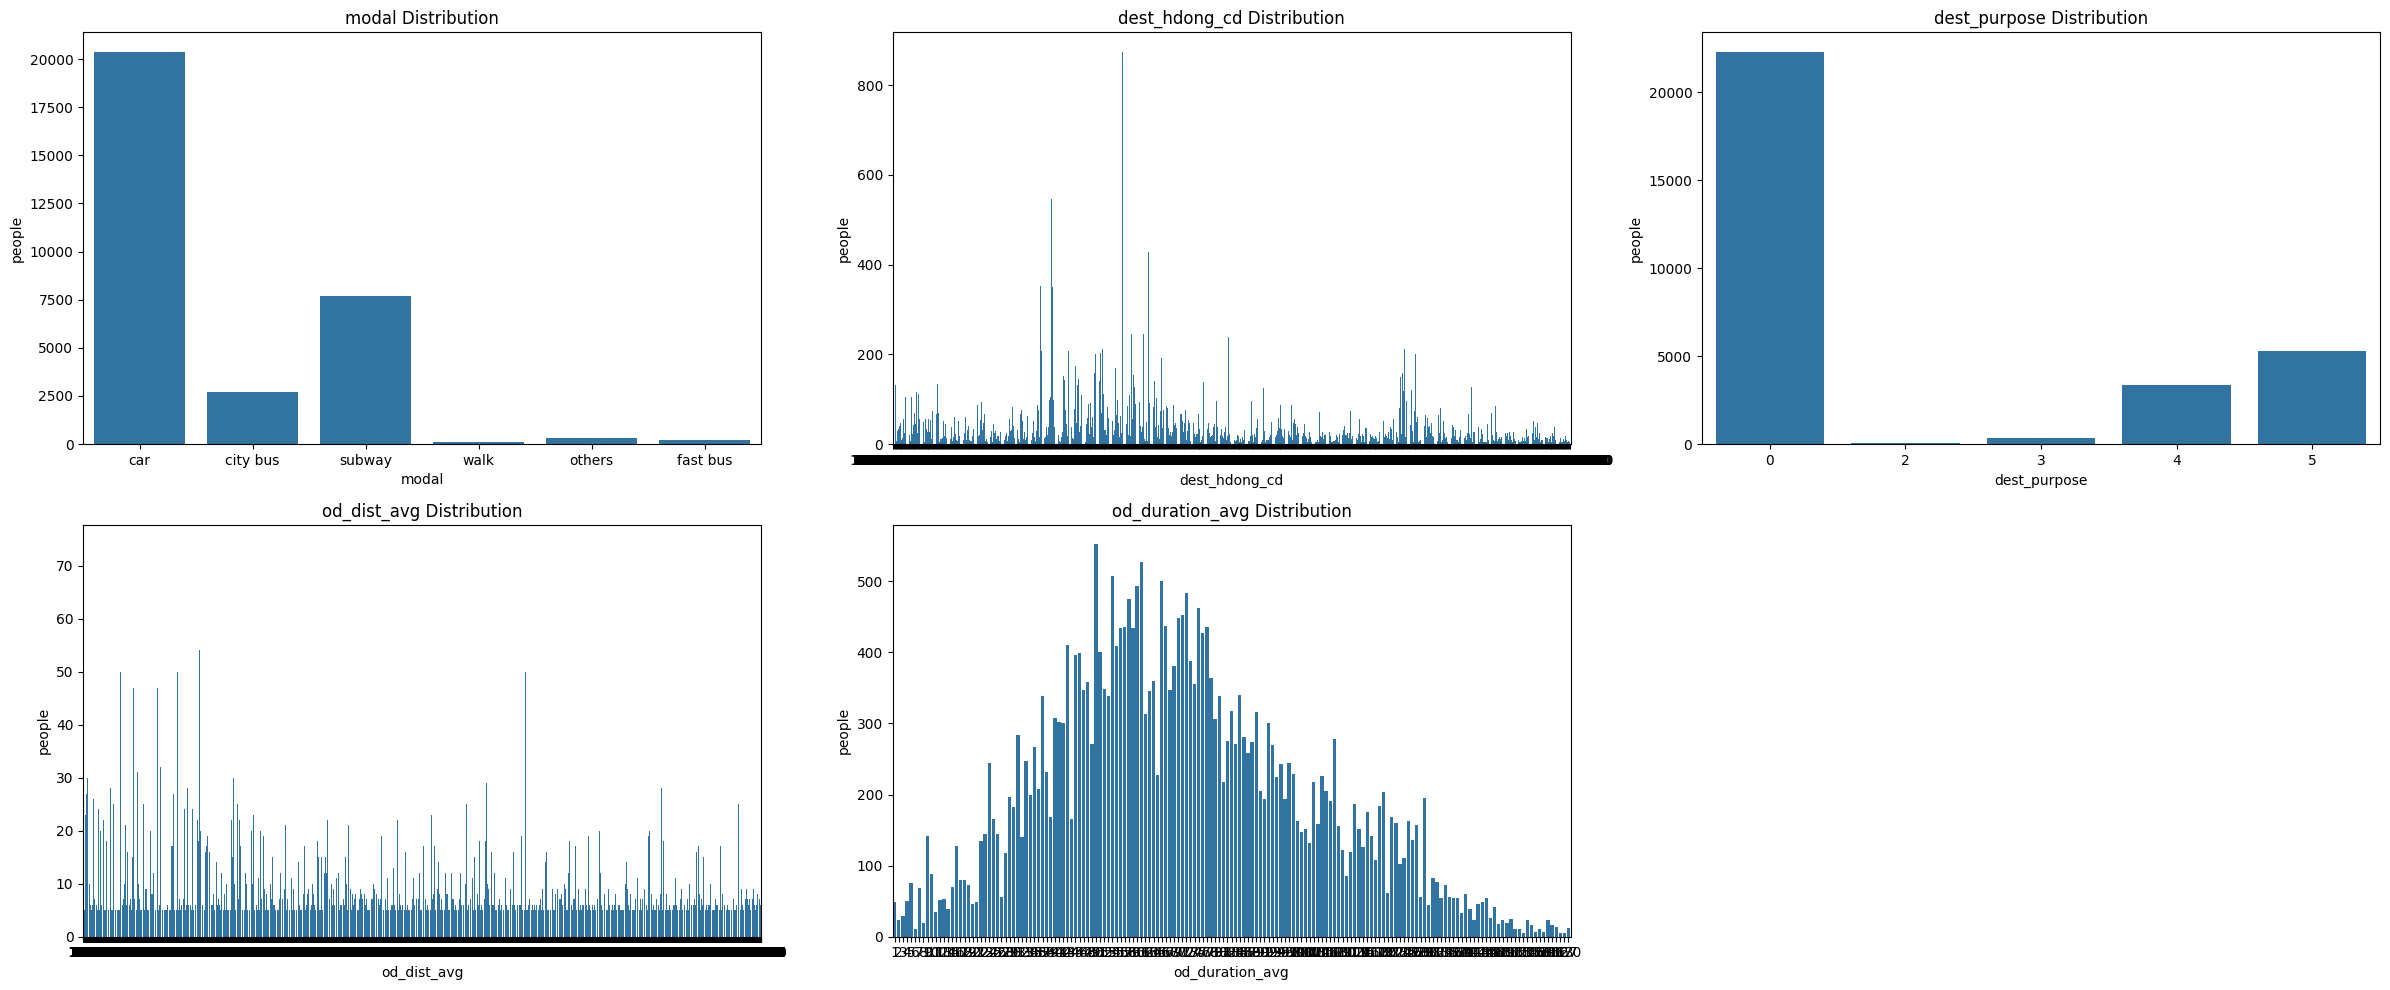

20231006


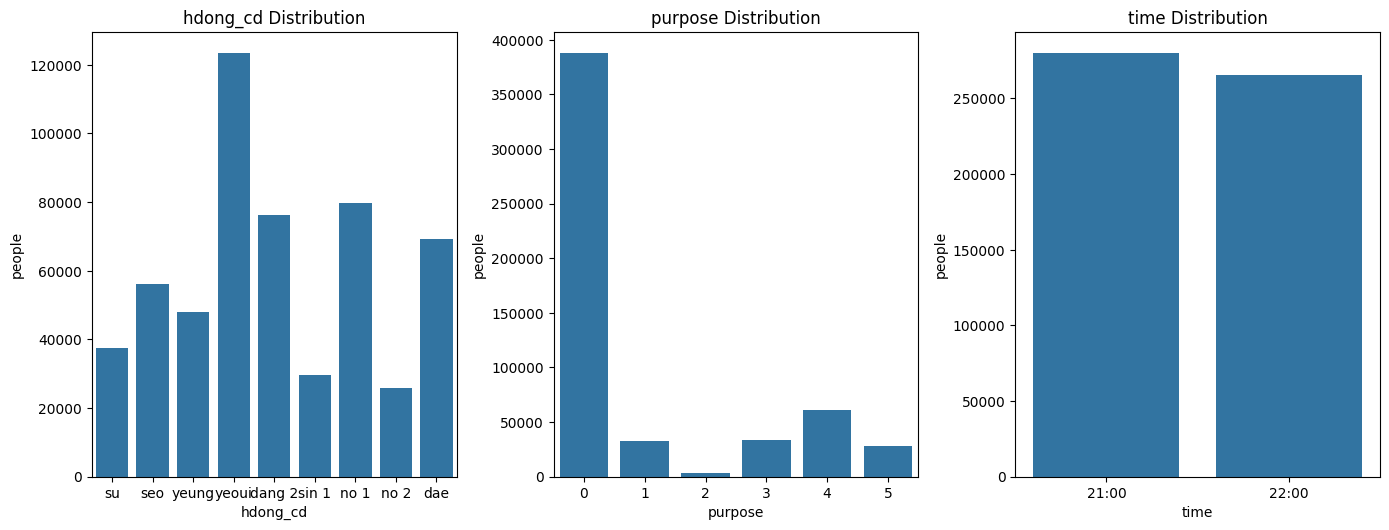

20231007


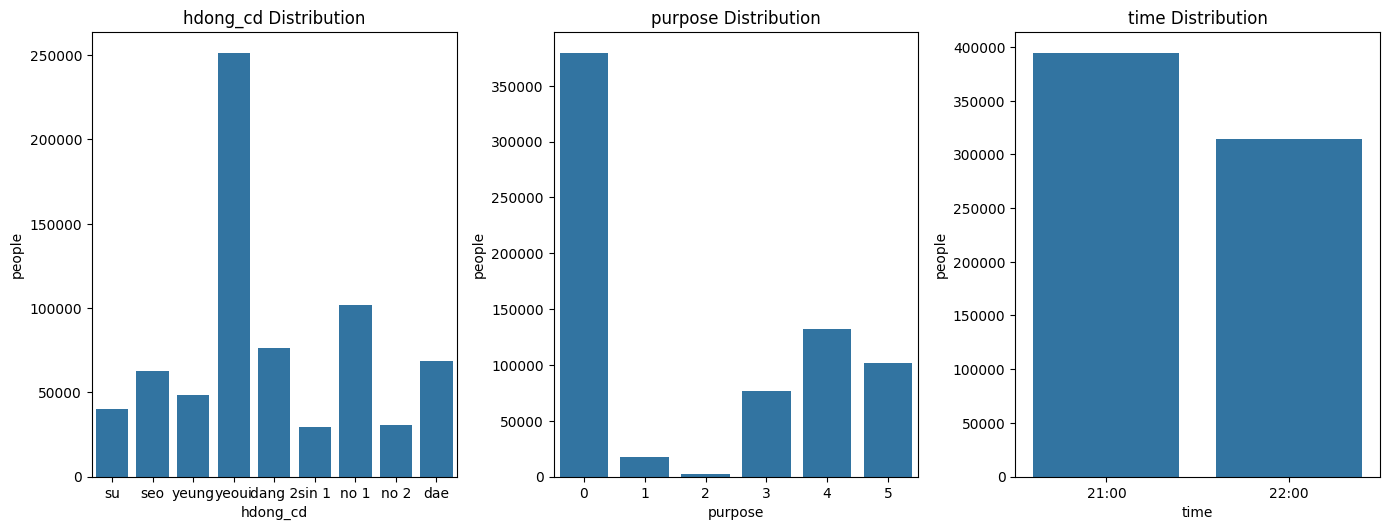

20231008


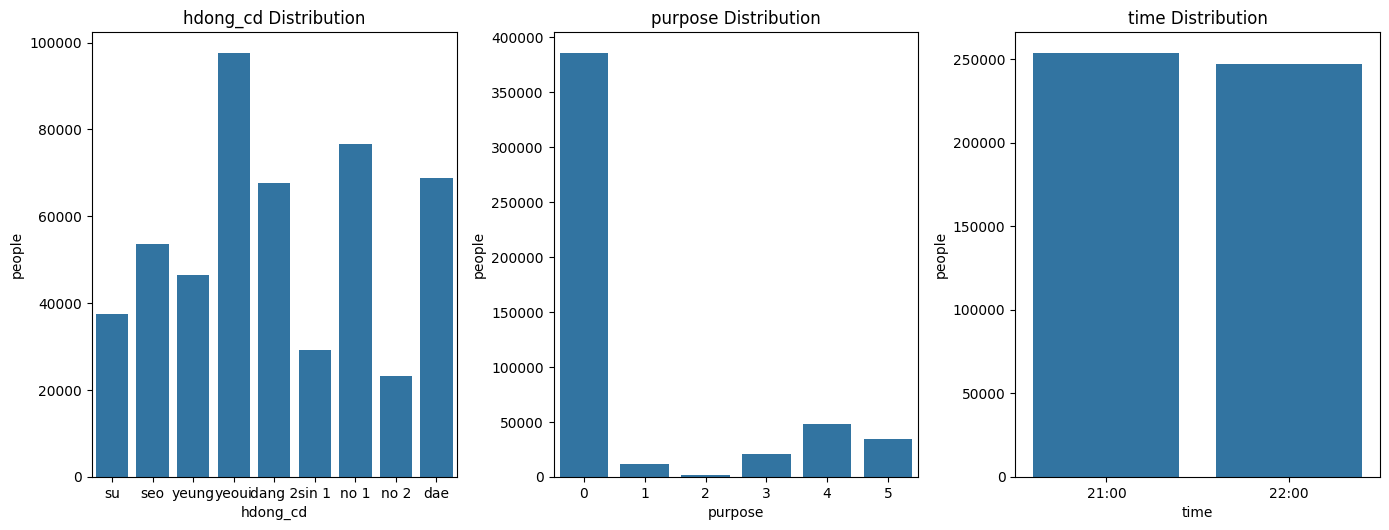

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

hdong_name_mapping = {
    1156054000: 'yeoui',
    1156063000: 'sin 1',
    1159051000: 'no 1',
    1159052000: 'no 2',
    1159066000: 'dae',
    1156053500: 'yeung',
    1156056000: 'dang 2',
    1144065500: 'seo',
    1144063000: 'su',
    1144059000: 'yong'
}

modal_mapping = {
    0: 'car',
    1: 'city bus',
    2: 'subway',
    3: 'walk',
    4: 'others',
    5: 'fast bus',
    6: 'plane'
}

def read_csv_files(directory):
    data_frames = {}
    print("\nReading CSV files:")
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            print(f"  Reading: {filename}")
            df = pd.read_csv(os.path.join(directory, filename))
            parts = filename.split('_')
            name = parts[0]
            date = parts[1]
            key = (name, date)
            data_frames[key] = df
    print(f"Total files read: {len(data_frames)}")
    return data_frames

def calculate_dt(df, code, codes):
    dt_result = {}
    
    for (name, date), df in df.items():
        dt = pd.DataFrame()
        df.pop('gender')
        df.pop('age')
        df.pop('date')
        if (name == 'od'):
            df = df[df['origin_hdong_cd'] == code]
            df = df[(df['start_time'] == '21:00') | (df['start_time'] == '22:00')]
            columns = ['modal', 'dest_hdong_cd', 'dest_purpose', 'od_dist_avg', 'od_duration_avg']
            draw_plot(df, columns, name)
        else:
            print(date)
            dt_result["stay"] = dt
            df = df[df['hdong_cd'].isin(codes)]
            df = df[(df['time'] == '21:00') | (df['time'] == '22:00')]
            columns = ['hdong_cd', 'purpose', 'time']
            draw_plot(df, columns, name)
            
    return dt_result

def draw_plot(df, columns, name):
    if name == 'od':
        plt.figure(figsize=(24, 10))
    else:
        plt.figure(figsize=(14, 10))
    
    for i, column in enumerate(columns, 1):
        plt.subplot(2, 3, i)
        grouped_data = df.groupby(column)[f'{name}_cnts'].sum().reset_index(name='people')
        if column == 'hdong_cd':
            grouped_data[column] = grouped_data[column].map(hdong_name_mapping)
        elif column == 'modal':
            grouped_data[column] = grouped_data[column].map(modal_mapping)
        sns.barplot(data=grouped_data, x=column, y='people')
        plt.title(f'{column} Distribution')

    plt.tight_layout()
    plt.show()

def main():
    directory = r'C:\Users\KIMSH\Downloads\lowdata'
    data_frames = read_csv_files(directory)
    
    # 여의동
    code = 1156054000
    # 여의동, 신길 1동, 노량진 1동, 노량진 2동, 대방동, 영등포동, 당산 2동
    codes = [1156054000, 1156063000, 1159051000, 1159052000, 1159066000, 1156053500, 1156056000, 1144065500, 1144063000]
    dt = calculate_dt(data_frames, code, codes)
    
if __name__ == "__main__":
    main()


Reading CSV files:
  Reading: od_20231007_1.csv
  Reading: stay_20231006_1.csv
  Reading: stay_20231007_1.csv
  Reading: stay_20231008_1.csv
Total files read: 4


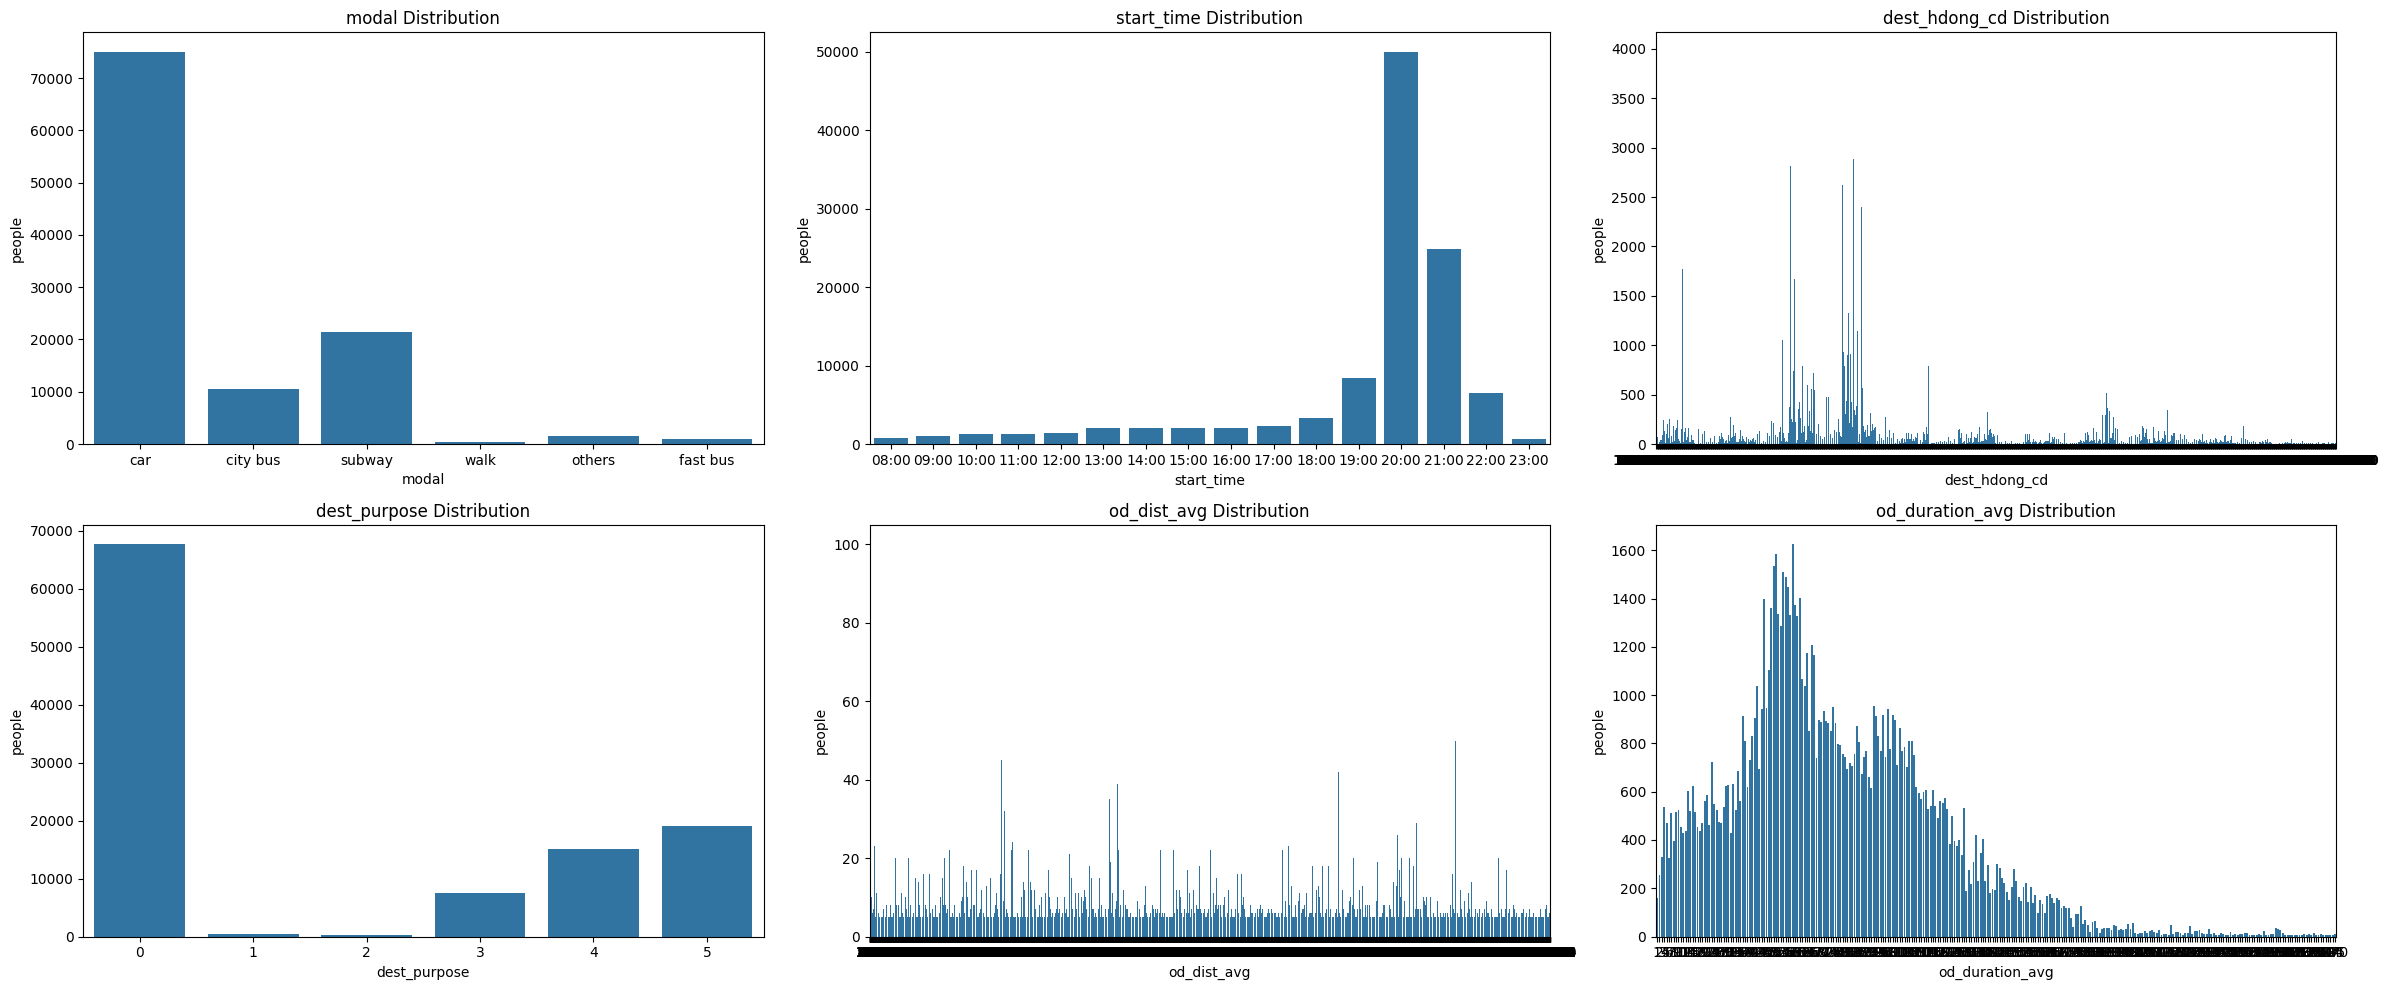

20231006


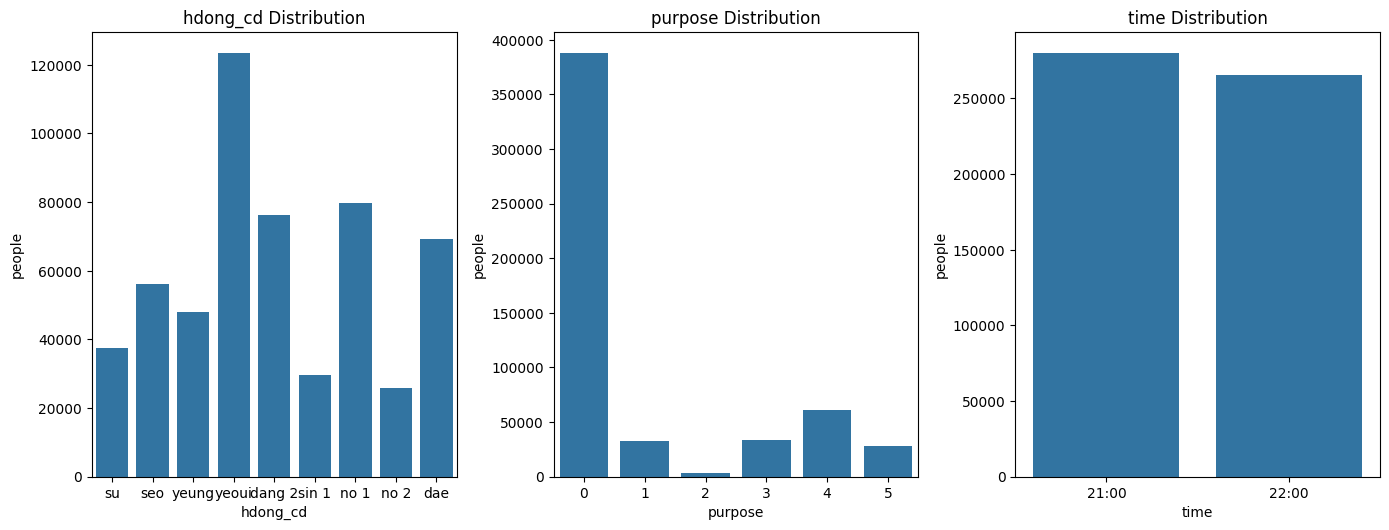

20231007


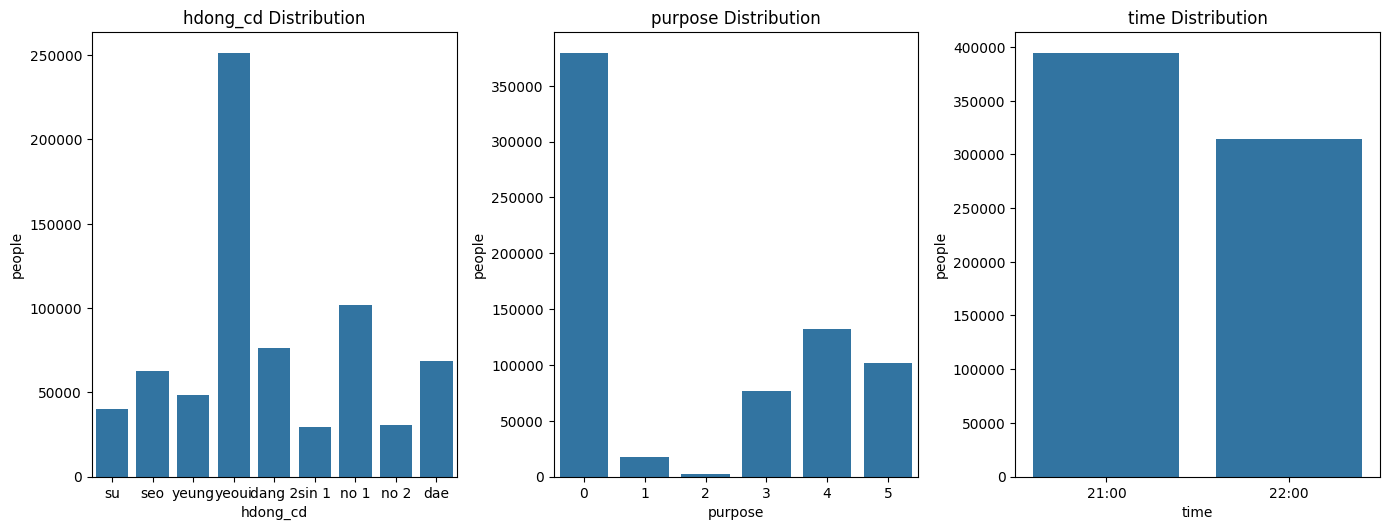

20231008


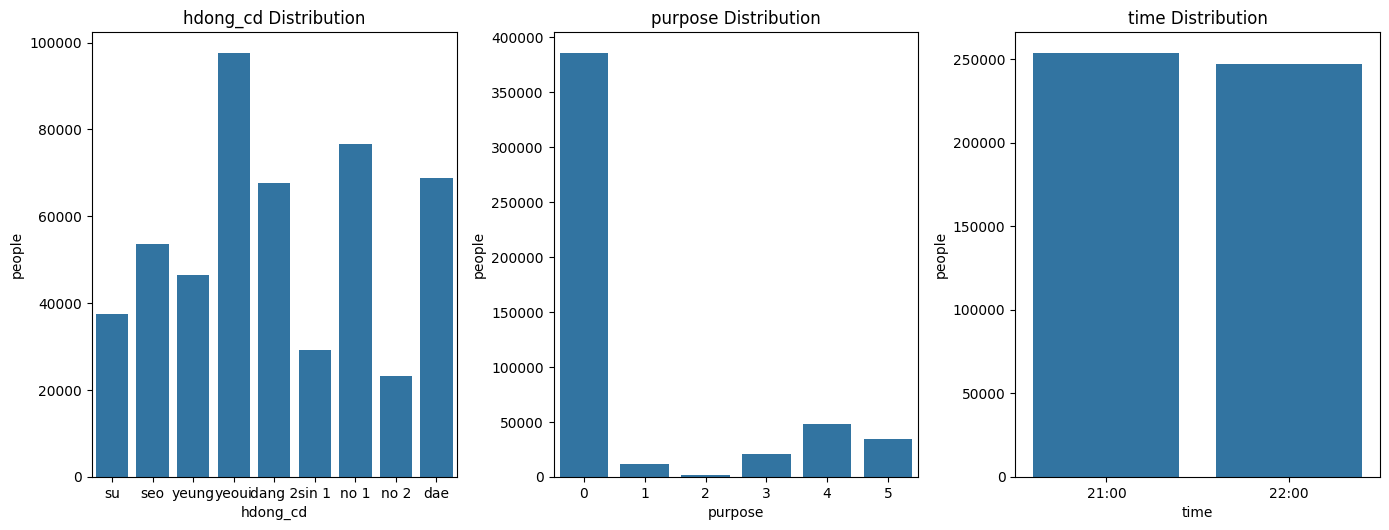

In [35]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

hdong_name_mapping = {
    1156054000: 'yeoui',
    1156063000: 'sin 1',
    1159051000: 'no 1',
    1159052000: 'no 2',
    1159066000: 'dae',
    1156053500: 'yeung',
    1156056000: 'dang 2',
    1144065500: 'seo',
    1144063000: 'su',
    1144059000: 'yong'
}

modal_mapping = {
    0: 'car',
    1: 'city bus',
    2: 'subway',
    3: 'walk',
    4: 'others',
    5: 'fast bus',
    6: 'plane'
}

def read_csv_files(directory):
    data_frames = {}
    print("\nReading CSV files:")
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            print(f"  Reading: {filename}")
            df = pd.read_csv(os.path.join(directory, filename))
            parts = filename.split('_')
            name = parts[0]
            date = parts[1]
            key = (name, date)
            data_frames[key] = df
    print(f"Total files read: {len(data_frames)}")
    return data_frames

def calculate_dt(df, code, codes):
    dt_result = {}
    
    for (name, date), df in df.items():
        dt = pd.DataFrame()
        df.pop('gender')
        df.pop('age')
        df.pop('date')
        if (name == 'od'):
            df = df[df['origin_hdong_cd'] == code]
            columns = ['modal', 'start_time', 'dest_hdong_cd', 'dest_purpose', 'od_dist_avg', 'od_duration_avg']
            draw_plot(df, columns, name)
        else:
            print(date)
            dt_result["stay"] = dt
            df = df[df['hdong_cd'].isin(codes)]
            df = df[(df['time'] == '21:00') | (df['time'] == '22:00')]
            columns = ['hdong_cd', 'purpose', 'time']
            draw_plot(df, columns, name)
            
    return dt_result

def draw_plot(df, columns, name):
    if name == 'od':
        plt.figure(figsize=(24, 10))
    else:
        plt.figure(figsize=(14, 10))
    
    for i, column in enumerate(columns, 1):
        plt.subplot(2, 3, i)
        grouped_data = df.groupby(column)[f'{name}_cnts'].sum().reset_index(name='people')
        if column == 'hdong_cd':
            grouped_data[column] = grouped_data[column].map(hdong_name_mapping)
        elif column == 'modal':
            grouped_data[column] = grouped_data[column].map(modal_mapping)
        sns.barplot(data=grouped_data, x=column, y='people')
        plt.title(f'{column} Distribution')

    plt.tight_layout()
    plt.show()

def main():
    directory = r'C:\Users\KIMSH\Downloads\lowdata'
    data_frames = read_csv_files(directory)
    
    # 여의동
    code = 1156054000
    # 여의동, 신길 1동, 노량진 1동, 노량진 2동, 대방동, 영등포동, 당산 2동
    codes = [1156054000, 1156063000, 1159051000, 1159052000, 1159066000, 1156053500, 1156056000, 1144065500, 1144063000]
    dt = calculate_dt(data_frames, code, codes)
    
if __name__ == "__main__":
    main()